#### **Course Project 3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#import data
df = pd.read_csv("house-prices.csv")

#view data
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


**Data Cleaning**

In [2]:
# check no duplications in the data
df.duplicated().sum()

0

*Missing Data*

In [3]:
# sort columns by total missing data values
df.isna().sum().sort_values(ascending=False)

Pool QC         2418
Misc Feature    2340
Alley           2267
Fence           1941
Fireplace Qu    1186
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

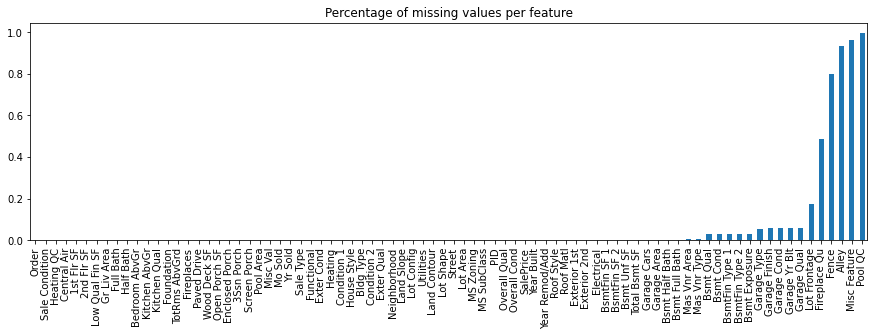

In [4]:
# visualise missing data per category
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

We can see from the visualisation that there are only a small number of variables with missing values.

In [5]:
# create dataframe from list of missing variables
missing_data = pd.DataFrame(df.isna().sum(), columns=["sum"])
missing_data = missing_data[missing_data["sum"]>0]

# pull list of variables from the new dataframe
missing_variables = missing_data.index.values

# display dataframe of these values
df_missing = df[missing_variables]
df_missing.head()

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,NaN,None,0.0,Gd,TA,No,GLQ,300.0,Unf,...,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,NaN,NaN,NaN
1,75.0,NaN,BrkFace,522.0,TA,TA,No,Unf,0.0,Unf,...,Attchd,1951.0,Unf,2.0,400.0,TA,TA,NaN,NaN,NaN
2,21.0,NaN,BrkFace,80.0,TA,TA,No,Unf,0.0,Unf,...,Attchd,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN
3,70.0,NaN,None,0.0,TA,TA,No,Rec,1018.0,Unf,...,Attchd,1959.0,RFn,2.0,447.0,TA,TA,NaN,NaN,NaN
4,60.0,NaN,None,0.0,TA,TA,No,Unf,0.0,Unf,...,Detchd,1960.0,Unf,1.0,308.0,TA,TA,NaN,MnPrv,NaN


Now that we have the dataframe of variables with missing values we can work through each one.

In [6]:
# review variables info 
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2010 non-null   float64
 1   Alley           163 non-null    object 
 2   Mas Vnr Type    2410 non-null   object 
 3   Mas Vnr Area    2410 non-null   float64
 4   Bsmt Qual       2359 non-null   object 
 5   Bsmt Cond       2359 non-null   object 
 6   Bsmt Exposure   2356 non-null   object 
 7   BsmtFin Type 1  2359 non-null   object 
 8   BsmtFin SF 1    2429 non-null   float64
 9   BsmtFin Type 2  2358 non-null   object 
 10  BsmtFin SF 2    2429 non-null   float64
 11  Bsmt Unf SF     2429 non-null   float64
 12  Total Bsmt SF   2429 non-null   float64
 13  Electrical      2429 non-null   object 
 14  Bsmt Full Bath  2428 non-null   float64
 15  Bsmt Half Bath  2428 non-null   float64
 16  Fireplace Qu    1244 non-null   object 
 17  Garage Type     2294 non-null   o

*Missing Categorical Data*

In [7]:
# start by selecting only categorical variables for review
missing_categorical = df_missing.select_dtypes(include="object").columns.values

# review subset
df_missing[missing_categorical].head()

,Alley,Mas Vnr Type,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,BuiltIn,Fin,TA,TA,NaN,NaN,NaN
1,NaN,BrkFace,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,TA,TA,No,Unf,Unf,SBrkr,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,TA,No,Rec,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,NaN,NaN
4,NaN,None,TA,TA,No,Unf,Unf,FuseF,Gd,Detchd,Unf,TA,TA,NaN,MnPrv,NaN


In [8]:
# confirm quantities of related variables are consistent ie all missing same quantity of values
missing_data.sort_values('sum', ascending=False)

,sum
Pool QC,2418
Misc Feature,2340
Alley,2267
Fence,1941
Fireplace Qu,1186
Lot Frontage,420
Garage Cond,138
Garage Qual,138
Garage Finish,138
Garage Yr Blt,138


Reviewing all the documentation for the categorical variables it is clear that all missing values are where there is none (ie no pool, no basement). Intuitive to replace all these missing values with 'NA' to be consistent with rest of data. However, the basement & garage variables have inconsistencies (small differences above) so need to review individually.

In [9]:
# review missing values within the basement category

# filter basement columns
basement = []
for column in df.columns:
    if column.startswith("Bsmt"):
        basement.append(column)

# create new dataframe for this data        
bsmt = df[basement]

# basement exposure has the most missing, so if we can confirm missing values in other categories are within this subset we can assume all due to no basement

# filter out the dataset with missing bsmt exposure
bsmt_missing = bsmt[bsmt['Bsmt Exposure'].isna()]

# display sums of missing values within the subset
bsmt_missing.isna().sum()

Bsmt Qual         71
Bsmt Cond         71
Bsmt Exposure     74
BsmtFin Type 1    71
BsmtFin SF 1       1
BsmtFin Type 2    71
BsmtFin SF 2       1
Bsmt Unf SF        1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

Need to look into the 3 values that have basement exposure missing and also the one value that is only missing BsmtFin Type 2

In [10]:
# locate value which has only type 2 values missing
df[basement].loc[(df['Bsmt Exposure'].notnull()) & (df['BsmtFin Type 2'].isnull())]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Bsmt Full Bath,Bsmt Half Bath
602,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,1.0,0.0


In [11]:
# as this value has SF2 but no Type it is clearly just a missing value so replace values with missing 
df.loc[(df['Bsmt Exposure'].notnull()) & (df['BsmtFin Type 2'].isnull()), ['BsmtFin Type 2']] = 'Missing'

In [12]:
# lcoate values that have only bsmt exposure missing
df[basement].loc[(df['Bsmt Exposure'].isnull()) & (df['BsmtFin Type 2'].notnull())]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Bsmt Full Bath,Bsmt Half Bath
875,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,0.0,0.0
1681,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,0.0,0.0
1726,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,0.0,0.0


Basement unfinished on these values so Exposure can be replaced with NA

In [13]:
# review missing values within the garage category

# filter garage columns
garage = []
for column in df.columns:
    if column.startswith("Garage"):
        garage.append(column)

# create new dataframe for this data        
garage = df[garage]

# Garage condition has the most missing values so looking to confirm all other missing variables are within this subset
garage_missing = garage[garage['Garage Cond'].isna()]

# display sums of missing values within the subset
garage_missing.isna().sum()

Garage Type      136
Garage Yr Blt    138
Garage Finish    138
Garage Cars        1
Garage Area        1
Garage Qual      138
Garage Cond      138
dtype: int64

As from the above we can confirm that missing values are all as a result of there being no garage outside of two missing values. Before replacing all missing values need to first find the two entries that have garage type but no other info as in this instance data is 'missing' rather than being no garage 

In [14]:
# locate the two entries and replace the missing values
df.loc[(df['Garage Type'].notnull()) & (df['Garage Finish'].isnull()), ['Garage Finish', 'Garage Qual', 'Garage Cond']] = 'Missing'    

Now that we are happy all missing categorical data remaining is a result of there being "None" we can replace all with 'NA'.

In [15]:
# now replace all missing values with 'none'
df[missing_categorical] = df[missing_categorical].fillna("NA")

*Missing Numerical Data*

In [16]:
# select only numerical variables for review
missing_numerical = df_missing.select_dtypes(include="float64").columns.values

# review subset
df_missing[missing_numerical].head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,NaN,0.0,300.0,0.0,652.0,952.0,0.0,0.0,2000.0,2.0,554.0
1,75.0,522.0,0.0,0.0,216.0,216.0,0.0,0.0,1951.0,2.0,400.0
2,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,1970.0,1.0,286.0
3,70.0,0.0,1018.0,0.0,380.0,1398.0,0.0,1.0,1959.0,2.0,447.0
4,60.0,0.0,0.0,0.0,925.0,925.0,0.0,0.0,1960.0,1.0,308.0


Need to work through individually to gauge best process to replace these missing values.


In [17]:
# list out columns in question
df_missing[missing_numerical].columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [18]:
# select variables that we know missing data is due to there being none
variables = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

# replace missing values with zero 
df[variables] = df[variables].fillna(0)

Garage Year built needs to be placed with a value that will not skew the data. Using the year in which the house was built is a sensible proxy given time of build would have been this had the garage been built.

In [19]:
# create mask of missing values 
mask = df["Garage Yr Blt"].isna()

# use mask to copy in values from year built
df.loc[mask, "Garage Yr Blt"] = df.loc[mask, "Year Built"]

Missing lot frontage values need to replace with a proxy. The best available within the data is the lot area. If we organise the values by Lot Area, using forward fill should be a good way to approximate the missing lot frontage.

In [20]:
# sort values
df = df.sort_values('Lot Area')

# forward fill missing values
df['Lot Frontage'] = df['Lot Frontage'].fillna(method="ffill")

# reset sort by index
df = df.sort_index()

All missing values shuold now be removed.

In [21]:
# confirm all missing values now removed
df.isna().sum().sort_values(ascending=False).head()

Order            0
Garage Finish    0
Garage Type      0
Fireplace Qu     0
Fireplaces       0
dtype: int64

*Correct Inconsistencies*

Order, PID, MS SubClass & MS Zoning are in a misleading numerical format and therefore should be amended.

In [22]:
# change dtype to object
df[['Order', 'PID', 'MS SubClass', 'MS Zoning']] = df[['Order', 'PID', 'MS SubClass', 'MS Zoning']].astype(object)

Review numerical terms graphically to spot any anomalies

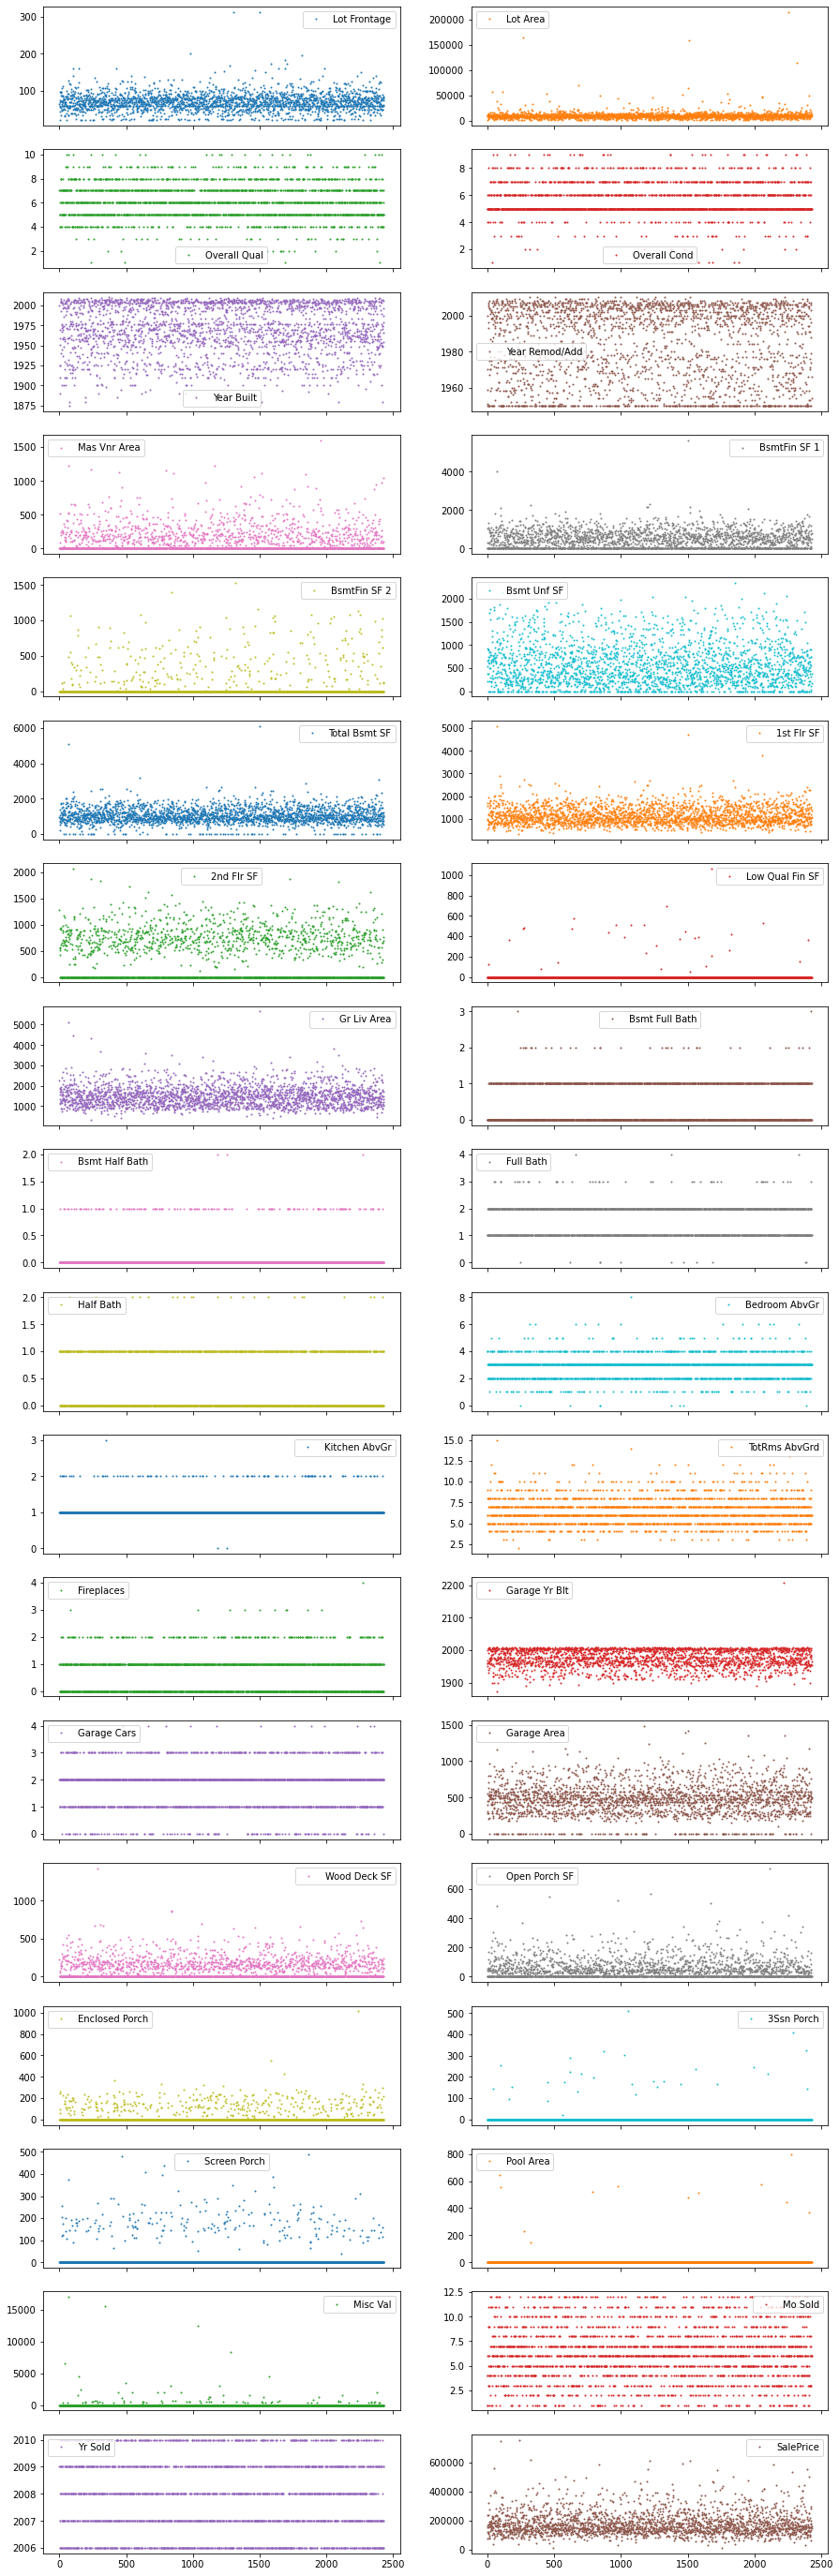

In [23]:
# identity all numerical columns
df_numerical = df.select_dtypes(exclude="object")

# plot all points from these variables
df_numerical.plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 50), markersize=2);

From the charts above it clear to see there is an error with a value in the Garage Year Built with an entry from > 2200.

In [24]:
# find the value
df['Garage Yr Blt'].sort_values(ascending=False).head(3)

2219    2207.0
1120    2010.0
506     2010.0
Name: Garage Yr Blt, dtype: float64

Safest assumption in this instance would be that the entry is a typo and the correct year is 2007. Verify this by reviewing when the property was built.

In [25]:
# locate entry and view year built
df.loc[2219,:]['Year Built']

2006

In [26]:
# edit the entry in the data
df.loc[2219,'Garage Yr Blt'] = 2007

*Ordinal & Numerical Encoding* 

Month sold currently in a numerical format which would be presuming that later in the year results in higher sales price. As this is not the case amending to categorical format.

In [27]:
# confirm the above by reviewing mean sale price for each month
df.groupby('Mo Sold')['SalePrice'].mean()

Mo Sold
1     191787.222222
2     178948.697248
3     178018.711230
4     166292.132159
5     173348.200000
6     180469.727488
7     181811.975936
8     185383.295699
9     192341.977778
10    180618.342657
11    190828.187500
12    182095.880435
Name: SalePrice, dtype: float64

In [28]:
# create two sets to build dictionary with
numbers = np.arange(1,13)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# build dictionary
num_month = dict(zip(numbers, months))

# map dictionary to mmonth sold column
df['Mo Sold'] = df['Mo Sold'].map(num_month)

Year Built and Quality intuitively should have positive correlation with Sales Price and therefore require numerical encoding. Confirming this below:

In [29]:
# filter out variables in year & quality format
date_quality = []

for column in df.columns:
    if "Year" in column:
        date_quality.append(column)
    elif "Yr" in column:
        date_quality.append(column)
        
for column in df.columns:
    if "Qual" in column:
        date_quality.append(column)
    elif "Qu" in column:
        date_quality.append(column)  

Graph relationships

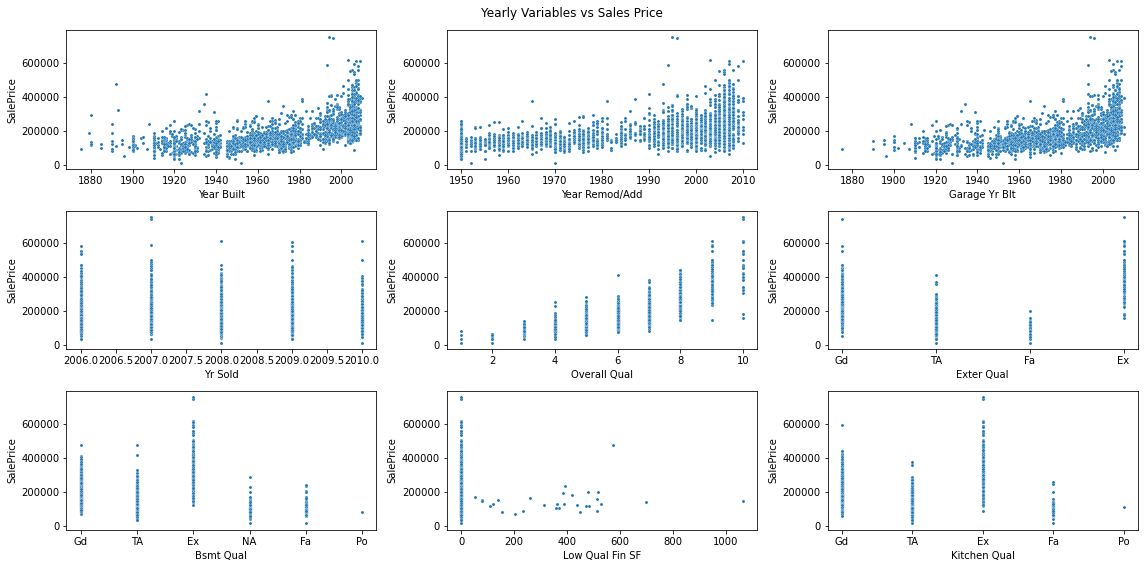

In [30]:
import seaborn as sns

# graph the relationships
fig, axes = plt.subplots(3, 3, figsize=(16,8))

for col, ax in zip(date_quality, axes.ravel()):
    fig.suptitle('Yearly Variables vs Sales Price')
    sns.scatterplot(
        data=df,
        x=col,
        y='SalePrice',
        ax=ax,
        s=10
    )

plt.tight_layout()

No positive correlation between years sold and Low Qual. However, graph clearly shows a positive correlation between years built, higher quality (Ex) and sales price. Therefore need to use integer encoding for these.

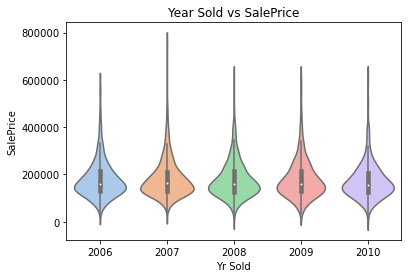

In [31]:
#graphically show the distribution between Years Sold to confirm above in clearer format
sns.violinplot(x="Yr Sold", y="SalePrice", data=df, palette="pastel")
plt.title("Year Sold vs SalePrice")
plt.show()

Update format of year sold so years treated without ranking

In [32]:
# update Yr Sold variable to be categorical
df['Yr Sold'] = df['Yr Sold'].astype('object')

Update year variables into integer encoding

In [33]:
# create subset of year variables
df_year = df[['Year Built','Year Remod/Add', 'Garage Yr Blt']] 

# define function that replaces year values with numbers based on 10% increments
def age(x):
    if x < years[0]:
        return 1
    elif years[0] <= x < years[1]:
        return 2
    elif years[1] <= x < years[2]:
        return 3
    elif years[2] <= x < years[3]:
        return 4
    elif years[3] <= x < years[4]:
        return 5
    elif years[4] <= x < years[5]:
        return 6
    elif years[5] <= x < years[6]:
        return 7
    elif years[6] <= x < years[7]:
        return 8
    elif years[7] <= x < years[8]:
        return 9
    elif x >= years[8]:
        return 10

# iterate over each of the columns calculating the 10 percentile ranges and applying function finally replacing original dataframe with new values    
for c in df_year:
    years = np.percentile(df[c], [10, 20, 30, 40, 50, 60, 70, 80, 90])
    values = df_year.loc[:, c].apply(lambda x: age(x))
    df[c] = values

Update quality variables into integer encoding

In [34]:
# create filter list of all variables ranked by condition
condition = []
for column in df.columns:
    if "Qual" in column:
        condition.append(column)
    elif "Qu" in column:
        condition.append(column)  
        
# select only those who are in object dtype
condition = df[condition].select_dtypes(include="object").columns

# confirm selected values
df[condition].head(3)

,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,Garage Qual
0,Gd,Gd,Gd,TA,TA
1,TA,TA,Gd,Gd,TA
2,TA,TA,TA,NA,TA


In [35]:
# define function to replace by quality rank

def quality(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x == 'NA':
        return 0
    elif x == 'Missing':    # for missing values replace with Median
        return 3 

# apply function on dataframe columns    
for c in df[condition]:
    df[c] = df[c].apply(lambda x: quality(x))

**Outliers**

In [36]:
# identify variables that could potentially have outliers that need to be removed ie more than 100 unique values
num_outliers = []

for x in df.select_dtypes(exclude="object"):
    if df[x].nunique() > 100:
        num_outliers.append(x)

num_outliers

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'SalePrice']

In [37]:
# create new df to work on with these features removing the dependent variable
df_num_outliers = df[num_outliers].drop('SalePrice', axis=1)

# define function that identifies individual z values and replaces with median of the overall column's data if it's z value is > 3
def f(x):
    if ((x - mean) / std) < 3:
        return x
    elif ((x - mean) / std) >= 3:
        return median

# apply function to all columns and replace original dataframe with new values
for c in df_num_outliers:
    mean = df_num_outliers[c].mean()
    std = df_num_outliers[c].std()
    median = df_num_outliers[c].median()
    values = df_num_outliers.loc[:, c].apply(lambda x: f(x))
    df[c] = values

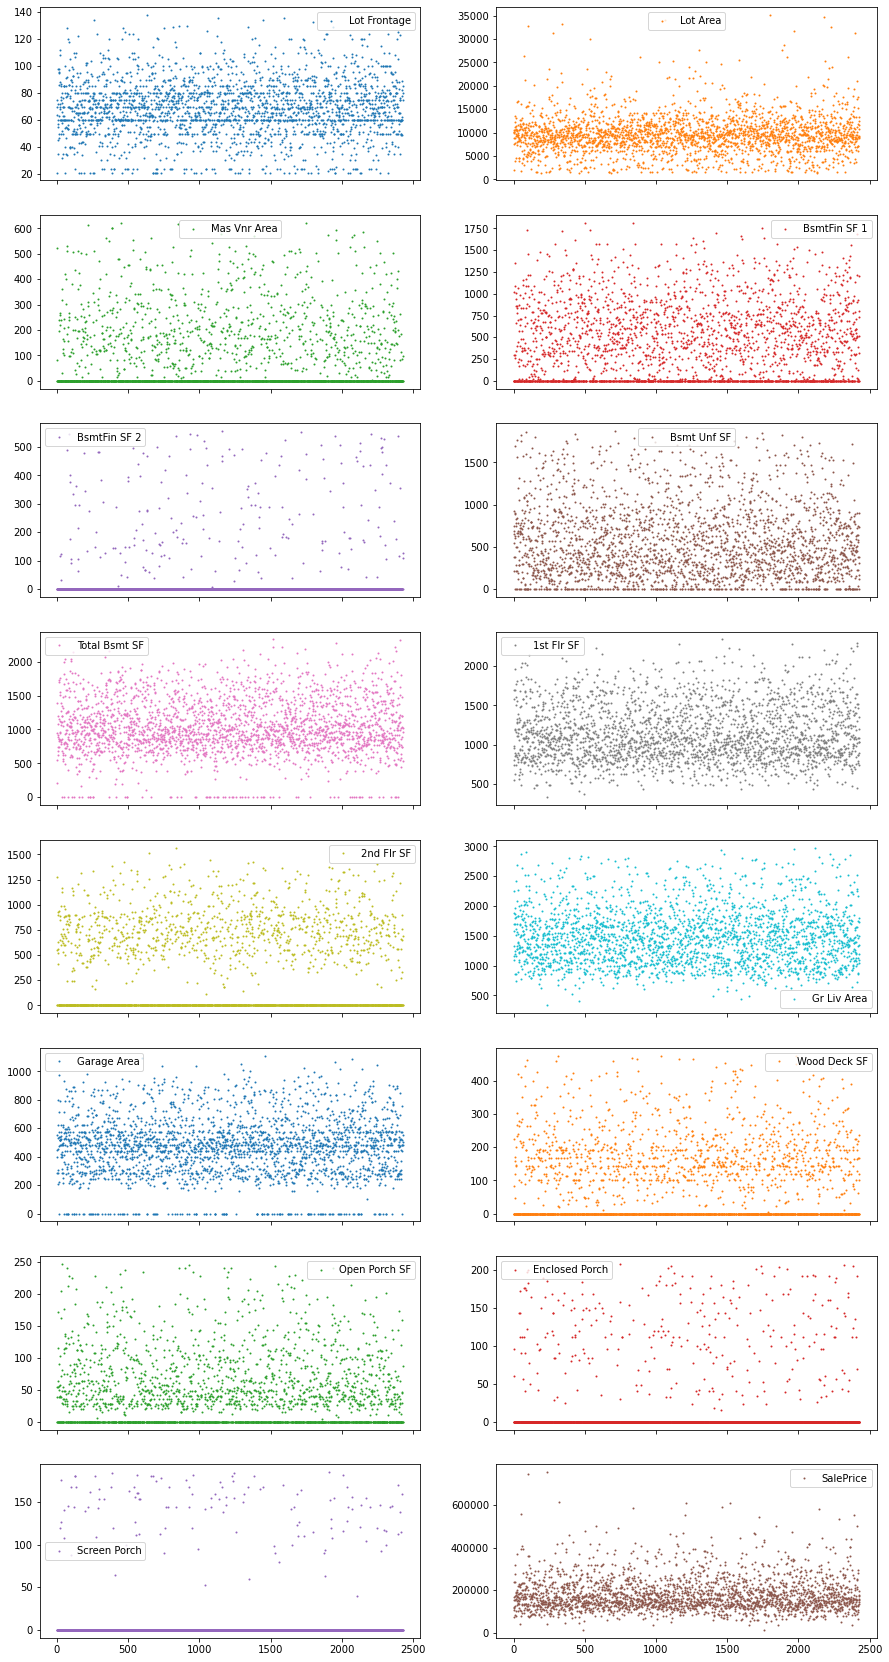

In [38]:
# plot new updated numerical data to confirm all outliers removed
df[num_outliers].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 30), markersize=2);

**Feature Engineering**

In order to avoid illconditioning, going to remove Total Bsmt SF & Total Rooms above ground as these are both summations of other columns.

In [39]:
# drop columns
df = df.drop(['Total Bsmt SF', 'TotRms AbvGrd'], axis=1)

Graphically representing numerical data can identify any "skewed" variables that may benefit from feature engineering

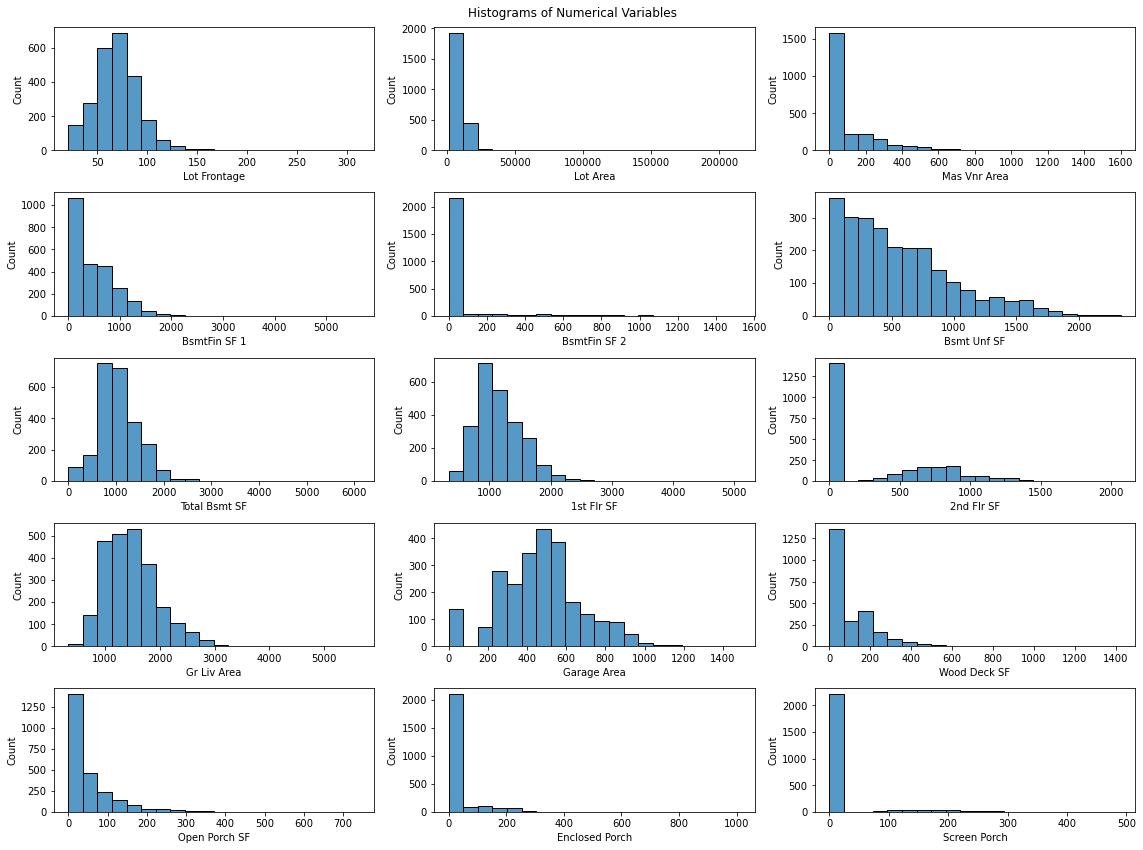

In [40]:
# plot numerical data as histogram using same fllter from outliers
fig, axes = plt.subplots(5, 3, figsize=(16,12))

for col, ax in zip(df_num_outliers.columns, axes.ravel()):
    fig.suptitle('Histograms of Numerical Variables')
    sns.histplot(
        data=df_numerical,
        bins=20,
        x=col,
        ax=ax,
    )

plt.tight_layout()

Select variables with highest skew

In [41]:
#review variables individual skews
df_num_outliers.skew().sort_values()

Garage Area        0.229064
2nd Flr SF         0.853701
Bsmt Unf SF        0.927352
Total Bsmt SF      1.230603
Gr Liv Area        1.268698
Lot Frontage       1.488610
BsmtFin SF 1       1.508212
1st Flr SF         1.533163
Wood Deck SF       1.911852
Mas Vnr Area       2.576207
Open Porch SF      2.649846
Screen Porch       3.777651
BsmtFin SF 2       4.036545
Enclosed Porch     4.188493
Lot Area          12.815462
dtype: float64

From both the above intuitive to select variables with a skew higher than 2

In [42]:
#select variables that have skew > +-2
skewed_variables  = []

for variable in df_num_outliers.columns:
    if df_num_outliers[variable].skew() > abs(2):
        skewed_variables.append(variable)

# replace variabes with log
df[skewed_variables] = np.log1p(df[skewed_variables])

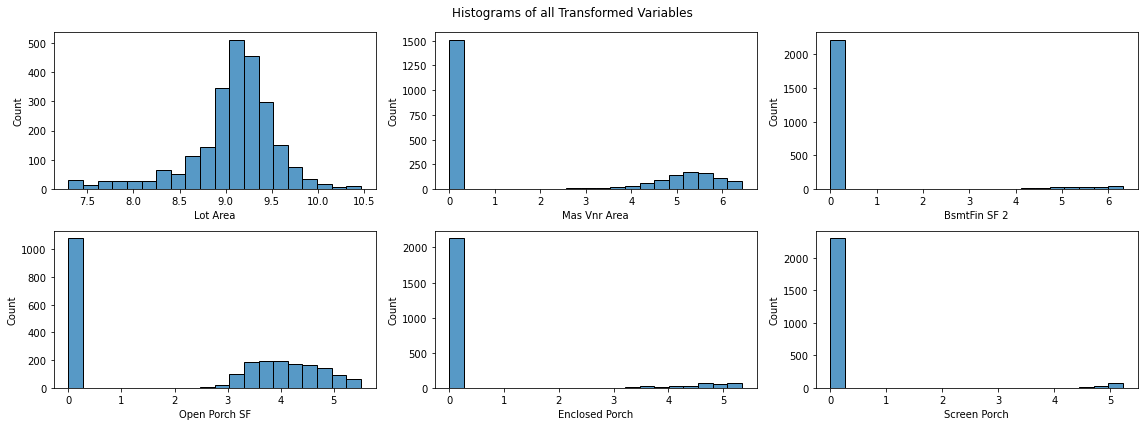

In [43]:
# replot all trasnformed variables
fig, axes = plt.subplots(2, 3, figsize=(16,6))

for col, ax in zip(df[skewed_variables].columns, axes.ravel()):
    fig.suptitle('Histograms of all Transformed Variables')
    sns.histplot(
        data=df[skewed_variables],
        bins=20,
        x=col,
        ax=ax,
    )

plt.tight_layout()

Using a scatter plot to identify variables that need polynomials added to better fit the data

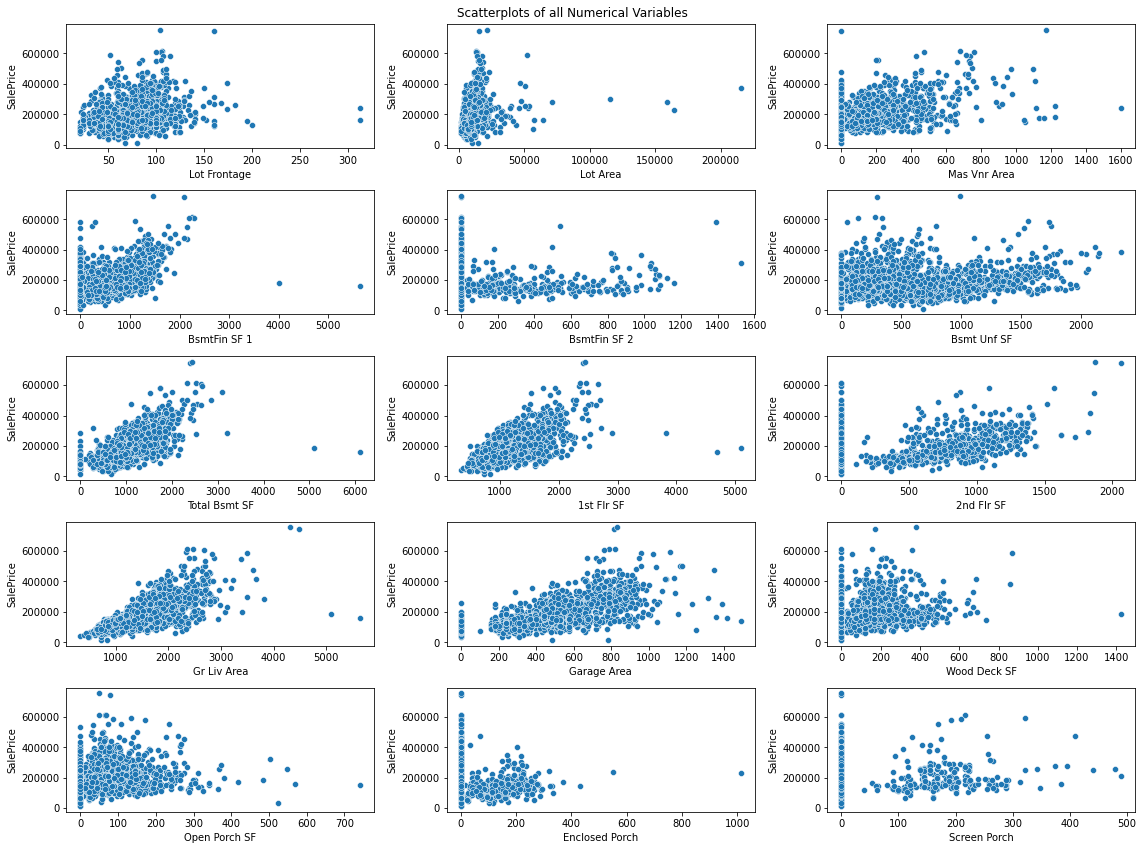

In [44]:
# plot numerical variables with a scatter plot
fig, axes = plt.subplots(5, 3, figsize=(16,12))

for col, ax in zip(df_num_outliers.columns, axes.ravel()):
    fig.suptitle('Scatterplots of all Numerical Variables')
    sns.scatterplot(
        data=df_numerical,
        x=col,
        y='SalePrice',
        ax=ax,
    )

plt.tight_layout()

Due to the profile of Bsmt Unf SF better to add the polynomial x squared feature

In [45]:
# create new column with squared data
df['Bsmt Unf SF ^ 2'] = df['Bsmt Unf SF']**2

Final steps in data preparation to remove identifiers and perform one hot encoding on categorical variables

In [46]:
# drop identifiers that will not be of use in our analysis
df = df.drop(['Order', 'PID'], axis=1)

# perform one hot encoding on all categorical varaiables
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include="object").columns)

**Model Fitting**

Start by reviewing dependent variable skew graphically

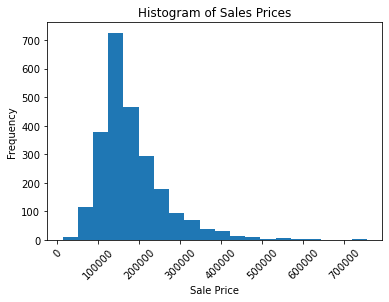

In [47]:
# plot histogram of sale prices
df.hist(column="SalePrice", bins=20, grid=False, xrot=45)
plt.title('Histogram of Sales Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

There is quite a large skew the data which will result higher prices skewing the data. As a result better to take the log of the variable within the models.

*Splitting the data*

In [48]:
# start by splitting data into train and validation groups

# import library to split
from sklearn.model_selection import train_test_split

# define values required for model
X = df_encoded.drop("SalePrice", axis=1).values
y = np.log10(df_encoded['SalePrice'].values)   # log of sales price

# Split data using sklearn function
train_df, val_df = train_test_split(
    df_encoded, train_size=0.7, test_size=0.3, random_state=0
)


Define error function to use in reviewing models

In [49]:
# definte calculation of Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

*Baseline Model*

Fit baseline model for comparative purposes on model errors

In [50]:
# calculate mean absolute error for the baseline mean model
baseline_mae = MAE((val_df['SalePrice'].values), (np.mean(train_df['SalePrice'].values)))

# print $ notional error amount
print("MAE mean baseline ${:,.0f}".format(MAE((val_df['SalePrice'].values), (np.mean(train_df['SalePrice'].values)))))

MAE mean baseline $57,270


*Simple Model - two variables*

Need to select two variables from the dataset. Intuitive to use the two variables with highest correlation with the target varaible for hope of a model that fits best.

In [51]:
# start by calculating overall correlations within the dataset
df_corr = df.corr(method="pearson")

# select target variable and order by highest correlation
df_corr.loc['SalePrice'].sort_values(ascending=False).head(5)

SalePrice       1.000000
Overall Qual    0.799022
Exter Qual      0.699312
Gr Liv Area     0.672736
Kitchen Qual    0.670522
Name: SalePrice, dtype: float64

Using Overall Quality and Exter Qual variables

In [52]:
# define variables for simple model
simple_variables = ['Overall Qual', 'Exter Qual']

# create input and output values for train and validation sets
X_tr_simple = train_df[simple_variables]
y_tr = np.log10(train_df['SalePrice'].values)

X_val_simple = val_df[simple_variables]
y_val = np.log10(val_df['SalePrice'].values)

# import linear regression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fit linear regressor & compute predictions from test data
lr.fit(X_tr_simple, y_tr)
y_pred_simple_lr = lr.predict(X_val_simple)

# calculate MAE of the simple model
simple_mae = MAE(10 ** y_val, 10 ** y_pred_simple_lr)

# print value in $ notional
print("MAE simple linear regression model in dollars ${:,.0f}".format(MAE(10 ** y_val, 10 ** y_pred_simple_lr)))

MAE simple linear regression model in dollars $29,023


Simple model shows a large improvement from the baseline model

*Intermediate Model - 10 variables*

In [53]:
# select 10 highest correlated variables
int_variables = pd.DataFrame(df_corr.loc['SalePrice'].sort_values(ascending=False).head(11))
int_variables = int_variables.drop('SalePrice')
int_variables = int_variables.index.values

# create input values for train and validation sets
X_tr_int = train_df[int_variables]

X_val_int = val_df[int_variables]

# fit linear regressor & compute predictions from test data
lr.fit(X_tr_int, y_tr)
y_pred_int_lr = lr.predict(X_val_int)

intermediate_mae = MAE(10 ** y_val, 10 ** y_pred_int_lr)

print("MAE intermediate linear regression model in dollars ${:,.0f}".format(MAE(10 ** y_val, 10 ** y_pred_int_lr)))

MAE intermediate linear regression model in dollars $18,509


Intermediate model shows a large improvement on both the baseline and simple models

*Complex Model - All Variables*

In [54]:
# create input values
X_tr_complex = train_df.drop('SalePrice', axis=1).values

X_val_complex = val_df.drop('SalePrice', axis=1).values

# fit linear regressor & compute predictions from test data
lr.fit(X_tr_complex, y_tr)
y_pred_complex_lr = lr.predict(X_val_complex)

complex_mae = MAE(10 ** y_val, 10 ** y_pred_complex_lr)

print("MAE complex linear regression model in dollars ${:,.0f}".format(MAE(10 ** y_val, 10 ** y_pred_complex_lr)))

MAE complex linear regression model in dollars $14,733


Complex model returns the smallest error across all models

**Regularization**

Regularization controls for overfitting by adding a constraint to the amplitude of coefficients calulcated by the model. The ridge model allows us to define what the constraint should be but first need to calculate the best value for this by tuning with grid search.

In [55]:
# ridge model is sensitive to the scale of the features and therefore requires standardising

# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_tr_rescaled = scaler.fit_transform(X_tr_complex)
X_val_rescaled = scaler.transform(X_val_complex)     # only transform the validation as do not want to learn mean from validation data

*Grid Search*

In [56]:
# import required libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# variable to store results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),   # power 10 as want MAE in $ not log $
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )
           

In [57]:
# convert results to a DF
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.001792,12731.221552,0.004136,14691.870288
1,0.000176,0.001792,12731.221333,0.004136,14691.869604
2,0.000309,0.001792,12731.220948,0.004136,14691.868404
3,0.000543,0.001792,12731.220272,0.004136,14691.866296
4,0.000954,0.001792,12731.219085,0.004136,14691.862589


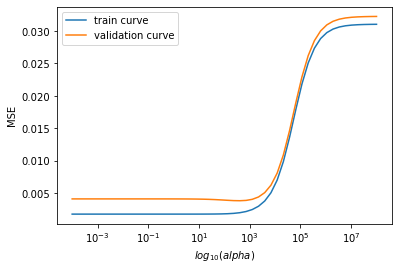

In [58]:
# visualise data using validation curves

# plot validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(gs_results["alpha"], gs_results["validation_mse"], label="validation curve")
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

Possible to see from the above chart that optimal range for the alpha value is around 10e3. The model overfits when alpha is smaller than 10e2 and underfits when alpha is larger than 10e4.

In [59]:
# get score with best validation MSE
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]

# print details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}".format(best_result.validation_mae))

Best alpha: 4.1e+02
Validation MSE: 0.0039
Validation MAE: 13,869


Now we have best alpha need to run ridge regression with this value

In [60]:
# run ridge regression
ridge = Ridge(alpha=best_result.alpha)  # applying best alpha score
ridge.fit(X_tr_rescaled, y_tr)

y_pred_ridge = ridge.predict(X_val_rescaled)

complex_mae = MAE(10 ** y_val, 10 ** y_pred_ridge)

print("MAE complex ridge regression model in dollars ${:,.0f}".format(MAE(10 ** y_val, 10 ** y_pred_ridge)))

MAE complex ridge regression model in dollars $13,869


**Final Comparison**

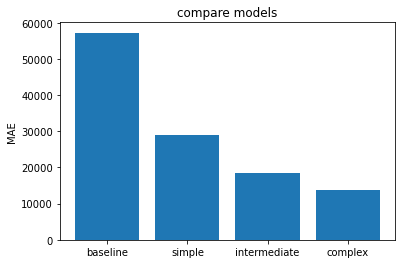

In [61]:
# Final comparison plot errors from each model
mae_values = [baseline_mae, simple_mae, intermediate_mae, complex_mae]
titles = ["baseline", "simple", "intermediate", "complex"]

plt.bar(titles, mae_values)
plt.title('compare models')
plt.ylabel("MAE")
plt.show()

**Predicting on Test Data**

In [62]:
# load test data
df_test = pd.read_csv("house-prices-test.csv")

In [63]:
# define formatting pre process to prepare test data to run model

def preprocess(df):
    # work on a copy
    df = df.copy()
    
    # drop identifiers & total columns
    df = df.drop(['Order', 'PID', 'Total Bsmt SF', 'TotRms AbvGrd'], axis=1)
    
    # fill applicable missing variables with Na/zero
    df[df.select_dtypes(include="object").columns] = df[df.select_dtypes(include="object").columns].fillna('NA')
    df[df.select_dtypes(exclude="object").columns] = df[df.select_dtypes(exclude="object").columns].fillna(0)
    
    # update dtypes
    df[['MS SubClass', 'MS Zoning', 'Yr Sold']] = df[['MS SubClass', 'MS Zoning', 'Yr Sold']].astype(object)
    
    # format columns
    df['Mo Sold'] = df['Mo Sold'].map(num_month)
    
    # feature encoding
    for c in df[['Year Built','Year Remod/Add', 'Garage Yr Blt']] :
        years = np.percentile(df[c], [10, 20, 30, 40, 50, 60, 70, 80, 90])
        values = df.loc[:, c].apply(lambda x: age(x))
        df[c] = values
    
    for c in df[['Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual']]:
        df[c] = df[c].apply(lambda x: quality(x))
        
    # add polynomial    
    df['Bsmt Unf SF ^ 2'] = df['Bsmt Unf SF']**2    
    
    # replace skewed variables with log
    df[skewed_variables] = np.log1p(df[skewed_variables])

    # one hot encoding
    df = pd.get_dummies(df, columns=df.select_dtypes(include="object").columns)
        
    return df


preprocessed_df = preprocess(df_test)
preprocessed_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.0,9.330432,6,7,1,2,6.175867,3,3,297.0,...,0,0,0,1,0,0,0,0,1,0
1,65.0,9.185843,5,7,7,7,0.000000,3,3,755.0,...,0,0,0,1,0,0,0,0,1,0
2,86.0,9.311633,8,5,10,10,6.670766,4,4,0.0,...,0,1,0,0,0,0,0,0,0,1
3,70.0,8.853808,5,7,3,8,3.828641,3,3,588.0,...,0,0,0,1,0,0,0,1,0,0
4,66.0,9.072571,4,7,1,2,0.000000,3,3,0.0,...,0,0,0,1,1,0,0,0,0,0


Encoding creates less variables than previous models as less data variety. For the model to work need to work on only variables that are available from the test dataset

In [64]:
# find any values that are in the test data but not in the training data
missing_cols = []

for c in preprocessed_df.columns:
    if c not in df_encoded.columns:
        missing_cols.append(c)
        
missing_cols

['Roof Matl_Roll', 'Exterior 2nd_Other']

In [65]:
# drop these variables as not possible to train on these variables
preprocessed_df = preprocessed_df.drop(['Roof Matl_Roll', 'Exterior 2nd_Other'], axis=1)

# create new training dataframe with new variables
df_encoded_train = df_encoded[preprocessed_df.columns]

In [66]:
# simple model

# create input variables
X_tr_simple = df_encoded_train[simple_variables].values
X_te_simple = preprocessed_df[simple_variables].values

y_tr = np.log10(df_encoded['SalePrice'].values)

# fit linear regressor & compute predictions from test data
lr.fit(X_tr_simple, y_tr)
y_pred_simple_lr = lr.predict(X_te_simple)


# intermediate model

# create input variables
X_tr_int = df_encoded_train[int_variables].values
X_te_int = preprocessed_df[int_variables].values

# fit linear regressor & compute predictions from test data
lr.fit(X_tr_int, y_tr)
y_pred_int_lr = lr.predict(X_te_int)


# complex model

# scale data 
X_tr_rescaled = scaler.fit_transform(df_encoded_train.values)
X_te_rescaled = scaler.transform(preprocessed_df.values)

# run ridge regression
ridge = Ridge(alpha=best_result.alpha)  # applying best alpha score
ridge.fit(X_tr_rescaled, y_tr)

y_pred_ridge = ridge.predict(X_te_rescaled)


In [67]:
# create csv files to evaluate

# create new DF with PID identifier column
predictions_simple = df_test[['PID']]

# create sales price column with predictions (reformatted into $) 
predictions_simple['SalePrice'] = 10 **y_pred_simple_lr

# export into csv file
predictions_simple.to_csv("predictions-simple-model.csv", index=False)

# repeat for intermediate model
predictions_int = df_test[['PID']]
predictions_int['SalePrice'] = 10 ** y_pred_int_lr
predictions_int.to_csv("predictions-intermediate-model.csv", index=False)

# repeat for complex model
predictions_complex = df_test[['PID']]
predictions_complex['SalePrice'] = 10 ** y_pred_ridge
predictions_complex.to_csv("predictions-complex-model.csv", index=False)


C:\Users\Rob\AppData\Local\Temp/ipykernel_11428/658200097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_simple['SalePrice'] = 10 **y_pred_simple_lr
C:\Users\Rob\AppData\Local\Temp/ipykernel_11428/658200097.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_int['SalePrice'] = 10 ** y_pred_int_lr
C:\Users\Rob\AppData\Local\Temp/ipykernel_11428/658200097.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,